In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.utils import resample
from torch.optim import Adam

In [22]:
class RedMulticapa(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, hidden3, hidden4, output_size):
        super(RedMulticapa, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden1)
        self.hidden2 = nn.Linear(hidden1, hidden2)
        self.hidden3 = nn.Linear(hidden2, hidden3)
        self.hidden4 = nn.Linear(hidden3, hidden4)
        self.output = nn.Linear(hidden4, output_size)
        self.sigmoid = nn.Sigmoid()
        self.loss = nn.BCELoss()
        self.historial = []

    def feed_forward(self, X):
        x = self.hidden1(X)
        x = self.sigmoid(x)
        x = self.hidden2(x)
        x = self.sigmoid(x)
        x = self.hidden3(x)
        x = self.sigmoid(x)
        x = self.hidden4(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

    def back_propagate(self, X, Y):
        outputs = self.feed_forward(X)
        error = self.loss(outputs, Y)
        self.zero_grad()
        error.backward()

    def track_progress(self, error):
        self.historial.append(error.item())

    def train(self, train_X, train_Y, optimizer, ciclos=10000):
        for i in range(ciclos):
            self.back_propagate(train_X, train_Y)
            optimizer.step()
            outputs = self.feed_forward(train_X)
            error = self.loss(outputs, train_Y)
            self.track_progress(error)

    def confusion(self, test_X, test_Y):
        with torch.no_grad():
            predictions = self.feed_forward(test_X)
            for i in range(len(predictions)):
                if predictions[i] <= 0.5:
                    predictions[i] = 0
                else:
                    predictions[i] = 1

        num_classes = 2
        confusion_matrix_result = [[0, 0], [0, 0]]

        for i in range(len(test_Y)):
            true_label = test_Y[i]
            pred = predictions[i]

            if true_label == pred:
                if pred == 1:
                    confusion_matrix_result[0][0] += 1
                else:
                    confusion_matrix_result[1][1] += 1
            else:
                if true_label == 1:
                    confusion_matrix_result[1][0] += 1
                else:
                    confusion_matrix_result[0][1] += 1

        return confusion_matrix_result

In [23]:
# Leer el archivo CSV
df1 = pd.read_csv('df_sim.csv')
df2 = pd.read_csv('df_sim2.csv')
df3 = pd.read_csv('df_sim3.csv')
df4 = pd.read_csv('df_sim4.csv')
df5 = pd.read_csv('df_sim5.csv')
df6 = pd.read_csv('df_sim6.csv')
df7 = pd.read_csv('df_sim7.csv')
df8 = pd.read_csv('df_sim8.csv')
df9 = pd.read_csv('df_sim9.csv')
df10 = pd.read_csv('df_sim10.csv')

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)
df = df.drop('HIVtreat', axis=1)


In [24]:
# 'sex' a one-hot
sex_columna = df[['sex']]
# Crear un codificador OneHotEncoder
encoder = OneHotEncoder()
# Ajustar el codificador a los datos y transformar la columna
sex_one_hot = encoder.fit_transform(sex_columna)
# Convertir la matriz de one-hot en un DataFrame
sex_one_hot_df = pd.DataFrame(sex_one_hot.toarray(), columns=encoder.get_feature_names_out(['sex']))
# Concatenar el DataFrame original con el DataFrame de one-hot
df_one_hot = pd.concat([df, sex_one_hot_df], axis=1)
# Imprimir el DataFrame resultante
df_one_hot.drop(['sex'], axis=1, inplace=True)

# 'age' a one-hot
age_columna = df[['age']]
# Crear un codificador OneHotEncoder
encoder = OneHotEncoder()
# Ajustar el codificador a los datos y transformar la columna
age_one_hot = encoder.fit_transform(age_columna)
# Convertir la matriz de one-hot en un DataFrame
age_one_hot_df = pd.DataFrame(age_one_hot.toarray(), columns=encoder.get_feature_names_out(['age']))
# Concatenar el DataFrame original con el DataFrame de one-hot
df_one_hot = pd.concat([df_one_hot, age_one_hot_df], axis=1)
# Imprimir el DataFrame resultante
df_one_hot.drop(['age'], axis=1, inplace=True)

# 'level of education' a one-hot
level_of_education_columna = df[['level of education']]
# Crear un codificador OneHotEncoder
encoder = OneHotEncoder()
# Ajustar el codificador a los datos y transformar la columna
level_of_education_one_hot = encoder.fit_transform(level_of_education_columna)
# Convertir la matriz de one-hot en un DataFrame
level_of_education_one_hot_df = pd.DataFrame(level_of_education_one_hot.toarray(), columns=encoder.get_feature_names_out(['level of education']))
# Concatenar el DataFrame original con el DataFrame de one-hot
df_one_hot = pd.concat([df_one_hot, level_of_education_one_hot_df], axis=1)
# Imprimir el DataFrame resultante
df_one_hot.drop(['level of education'], axis=1, inplace=True)

In [25]:
# Supongamos que tu DataFrame en one-hot se llama df_one_hot y la columna de la clase se llama 'clase'
X = df_one_hot.drop('HSV-2 infection', axis=1)  # Características (variables independientes)
y = df_one_hot['HSV-2 infection']  # Variable objetivo (clase)

# Dividir el conjunto de datos en entrenamiento y prueba manteniendo la proporción de clases
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]

# Imprimir las formas de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", Y_train.shape)
print("Forma de y_test:", Y_test.shape)

Forma de X_train: (37376, 26)
Forma de X_test: (9344, 26)
Forma de y_train: (37376,)
Forma de y_test: (9344,)


In [26]:
# Concatenar X_train e y_train para facilitar el remuestreo
train_data = pd.concat([X_train, Y_train], axis=1)

# Separar los datos de cada clase
clase_positiva = train_data[train_data['HSV-2 infection'] == 1]
clase_negativa = train_data[train_data['HSV-2 infection'] == 0]

# Igualar el número de ejemplos para cada clase en el conjunto de entrenamiento
n_muestras = int(min(len(clase_positiva), len(clase_negativa)))
clase_positiva_muestreada = resample(clase_positiva, replace=False, n_samples=len(clase_positiva), random_state=42)
clase_negativa_muestreada = resample(clase_negativa, replace=False, n_samples=n_muestras, random_state=42)

# Concatenar los datos de las dos clases muestreadas
train_data_balanceado = pd.concat([clase_positiva_muestreada, clase_negativa_muestreada])

# Separar características y etiquetas nuevamente
X_train_balanceado = train_data_balanceado.drop('HSV-2 infection', axis=1)
Y_train_balanceado = train_data_balanceado['HSV-2 infection']

# Encontrar los índices de los ejemplos que no se usaron en el conjunto de entrenamiento balanceado
indices_no_balanceados = train_data.index.difference(train_data_balanceado.index)

# Pasar los ejemplos restantes al conjunto de prueba
X_test_sin = np.copy(X_test)
Y_test_sin = np.copy(Y_test)
X_test = X_test.append(X_train.loc[indices_no_balanceados])
Y_test = Y_test.append(Y_train.loc[indices_no_balanceados])

# Eliminar los ejemplos restantes del conjunto de entrenamiento original
X_train = X_train.drop(indices_no_balanceados)
Y_train = Y_train.drop(indices_no_balanceados)

# Imprimir las formas de los conjuntos de entrenamiento y prueba balanceados
print("Forma de X_train_balanceado:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train_balanceado:", Y_train.shape)
print("Forma de y_test:", Y_test.shape)
print(X_test_sin.shape)

Forma de X_train_balanceado: (5024, 26)
Forma de X_test: (41696, 26)
Forma de y_train_balanceado: (5024,)
Forma de y_test: (41696,)
(9344, 26)


In [27]:
'''
max_samples = max(pd.Series(Y_train).value_counts())

print(np.unique(Y_train))

for label in np.unique(Y_train):
    label_indices = np.where(Y_train == label)[0]
    while len(label_indices) < max_samples:
        label_indices = np.concatenate((label_indices, np.random.choice(label_indices, max_samples - len(label_indices))))
    np.random.shuffle(label_indices)
    if label == np.unique(Y_train)[0]:
        train_indices = label_indices
    else:
        train_indices = np.concatenate((train_indices, label_indices))

X_train = X_train.iloc[train_indices]
Y_train = Y_train.iloc[train_indices]

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", Y_train.shape)
print("Forma de y_test:", Y_test.shape)
'''


'\nmax_samples = max(pd.Series(Y_train).value_counts())\n\nprint(np.unique(Y_train))\n\nfor label in np.unique(Y_train):\n    label_indices = np.where(Y_train == label)[0]\n    while len(label_indices) < max_samples:\n        label_indices = np.concatenate((label_indices, np.random.choice(label_indices, max_samples - len(label_indices))))\n    np.random.shuffle(label_indices)\n    if label == np.unique(Y_train)[0]:\n        train_indices = label_indices\n    else:\n        train_indices = np.concatenate((train_indices, label_indices))\n\nX_train = X_train.iloc[train_indices]\nY_train = Y_train.iloc[train_indices]\n\nprint("Forma de X_train:", X_train.shape)\nprint("Forma de X_test:", X_test.shape)\nprint("Forma de y_train:", Y_train.shape)\nprint("Forma de y_test:", Y_test.shape)\n'

In [28]:
# Convertir los DataFrames de pandas a matrices numpy
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [29]:
# Convertir las matrices numpy a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

# Convertir arrays numpy a tensores PyTorch
X_test_sin = torch.tensor(X_test_sin, dtype=torch.float32)
Y_test_sin = torch.tensor(Y_test_sin, dtype=torch.float32)

# Clonar y desvincular si es necesario (esto es opcional y depende del uso)
X_test_sin = X_test_sin.clone().detach().float()
Y_test_sin = Y_test_sin.clone().detach().float()

In [30]:
input_size = 26
hidden1 = 20
hidden2 = 15
hidden3= 10
hidden4= 5
output_size = 1

'''
input_size = 26
hidden1 = 52
hidden2 = 60  
hidden3= 70
hidden4= 40
hidden5 = 26
output_size = 2
'''

modelo2 = RedMulticapa(input_size, hidden1, hidden2, hidden3, hidden4, output_size)
#modelo2.load_state_dict(torch.load('modelo_entrenado_BCE.pth'))
print(modelo2)
optimizer = Adam(modelo2.parameters(), lr=0.01)
modelo2.train(X_train, Y_train.unsqueeze(1), optimizer, ciclos=20000)

RedMulticapa(
  (hidden1): Linear(in_features=26, out_features=20, bias=True)
  (hidden2): Linear(in_features=20, out_features=15, bias=True)
  (hidden3): Linear(in_features=15, out_features=10, bias=True)
  (hidden4): Linear(in_features=10, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (loss): BCELoss()
)


In [31]:
optimizer = Adam(modelo2.parameters(), lr=0.001)
modelo2.train(X_train, Y_train.unsqueeze(1), optimizer, ciclos=10000)

In [32]:
#optimizer = Adam(modelo2.parameters())
#modelo2.train(X_train, Y_train.unsqueeze(1), optimizer, ciclos=5000)

In [35]:
Confusion = np.copy(np.array(modelo2.confusion(X_train, Y_train)))
print("VP Entrenamiento: ", Confusion[0][0])
print("VN Entrenamiento: ", Confusion[1][1])
print("FP Entrenamiento: ", Confusion[0][1])
print("FN Entrenamiento: ", Confusion[1][0])

Confusion = np.copy(np.array(modelo2.confusion(X_test, Y_test)))
print("VP Prueba: ", Confusion[0][0])
print("VN Prueba: ", Confusion[1][1])
print("FP Prueba: ", Confusion[0][1])
print("FN Prueba: ", Confusion[1][0])

Confusion = np.copy(np.array(modelo2.confusion(X_test_sin, Y_test_sin)))
print("VP Prueba sin extras: ", Confusion[0][0])
print("VN Prueba sin extras: ", Confusion[1][1])
print("FP Prueba sin extras: ", Confusion[0][1])
print("FN Prueba sin extras: ", Confusion[1][0])

print("Matriz de confusión con Adam")

VP Entrenamiento:  2426
VN Entrenamiento:  2394
FP Entrenamiento:  118
FN Entrenamiento:  86
VP Prueba:  500
VN Prueba:  32316
FP Prueba:  8752
FN Prueba:  128
VP Prueba sin extras:  500
VN Prueba sin extras:  6885
FP Prueba sin extras:  1831
FN Prueba sin extras:  128
Matriz de confusión con Adam


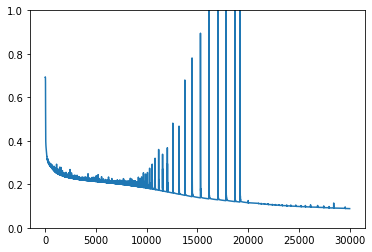

In [36]:
plt.plot(modelo2.historial)
plt.ylim(0,1)
plt.show()

In [ ]:
#torch.save(modelo2.state_dict(), 'modelo_entrenado_BCE_sim.pth')
#np.save('historialmodelo2_sim.npy', modelo2.historial)

In [42]:
# Leer el archivo CSV
df = pd.read_csv('dfCowanDuflo.csv')
# df = pd.read_csv('df_sim.csv')

# 'sex' a one-hot
sex_columna = df[['sex']]
# Crear un codificador OneHotEncoder
encoder = OneHotEncoder()
# Ajustar el codificador a los datos y transformar la columna
sex_one_hot = encoder.fit_transform(sex_columna)
# Convertir la matriz de one-hot en un DataFrame
sex_one_hot_df = pd.DataFrame(sex_one_hot.toarray(), columns=encoder.get_feature_names_out(['sex']))
# Concatenar el DataFrame original con el DataFrame de one-hot
df_one_hot = pd.concat([df, sex_one_hot_df], axis=1)
# Imprimir el DataFrame resultante
df_one_hot.drop(['sex'], axis=1, inplace=True)

# 'age' a one-hot
age_columna = df[['age']]
# Crear un codificador OneHotEncoder
encoder = OneHotEncoder()
# Ajustar el codificador a los datos y transformar la columna
age_one_hot = encoder.fit_transform(age_columna)
# Convertir la matriz de one-hot en un DataFrame
age_one_hot_df = pd.DataFrame(age_one_hot.toarray(), columns=encoder.get_feature_names_out(['age']))
# Concatenar el DataFrame original con el DataFrame de one-hot
df_one_hot = pd.concat([df_one_hot, age_one_hot_df], axis=1)
# Imprimir el DataFrame resultante
df_one_hot.drop(['age'], axis=1, inplace=True)

# 'level of education' a one-hot
level_of_education_columna = df[['level of education']]
# Crear un codificador OneHotEncoder
encoder = OneHotEncoder()
# Ajustar el codificador a los datos y transformar la columna
level_of_education_one_hot = encoder.fit_transform(level_of_education_columna)
# Convertir la matriz de one-hot en un DataFrame
level_of_education_one_hot_df = pd.DataFrame(level_of_education_one_hot.toarray(), columns=encoder.get_feature_names_out(['level of education']))
# Concatenar el DataFrame original con el DataFrame de one-hot
df_one_hot = pd.concat([df_one_hot, level_of_education_one_hot_df], axis=1)
# Imprimir el DataFrame resultante
df_one_hot.drop(['level of education'], axis=1, inplace=True)


X = df_one_hot.drop('HSV-2 infection', axis=1)  # Características (variables independientes)
y = df_one_hot['HSV-2 infection']  # Variable objetivo (clase)
X = X.to_numpy()
Y = y.to_numpy()
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)


In [43]:
Confusion = np.copy(np.array(modelo2.confusion(X, Y)))
print("VP: ", Confusion[0][0])
print("VN: ", Confusion[1][1])
print("FP: ", Confusion[0][1])
print("FN: ", Confusion[1][0])

VP:  298
VN:  2363
FP:  2650
FN:  220
